In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
test.drop('PassengerId',axis=1,inplace=True)
test.drop('Ticket',axis=1,inplace=True)

data.drop('PassengerId',axis=1,inplace=True)
data.drop('Ticket',axis=1,inplace=True)

In [3]:
#Taking Name in consideration next for deciding age from median of ages
data['Name'] = data['Name'].map(lambda x : x.split(',')[1].split('.')[0].strip())
test['Name'] = test['Name'].map(lambda x : x.split(',')[1].split('.')[0].strip())

In [4]:
data['Age'].fillna('-1',inplace=True)
titles = data['Name'].unique()
medians = dict()
for title in titles:
    m = data['Age'][(data['Age'] == -1) & (data['Name']==title)].median()
    medians[title] = m
for index, row in data.iterrows():
    if row['Age'] == -1:
        data.loc[index,'Age'] = medians[row['Name']]
        
test['Age'].fillna('-1',inplace=True) 
titles = data['Name'].unique()
medians = dict()
for title in titles:
    m = test['Age'][(test['Age'] == -1) & (test['Name']==title)].median()
    medians[title] = m
for index, row in test.iterrows():
    if row['Age'] == -1:
        test.loc[index,'Age'] = medians[row['Name']]        

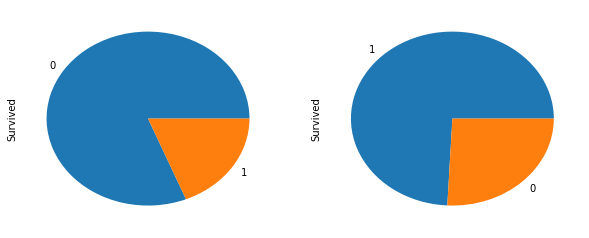

In [5]:
#Checking relations for Sex
fig = plt.figure(figsize=(10,4))
fig.add_subplot(121) 
data.Survived[data['Sex'] == "male"].value_counts().plot(kind='pie')
fig.add_subplot(122)
data.Survived[data['Sex'] == "female"].value_counts().plot(kind='pie') 

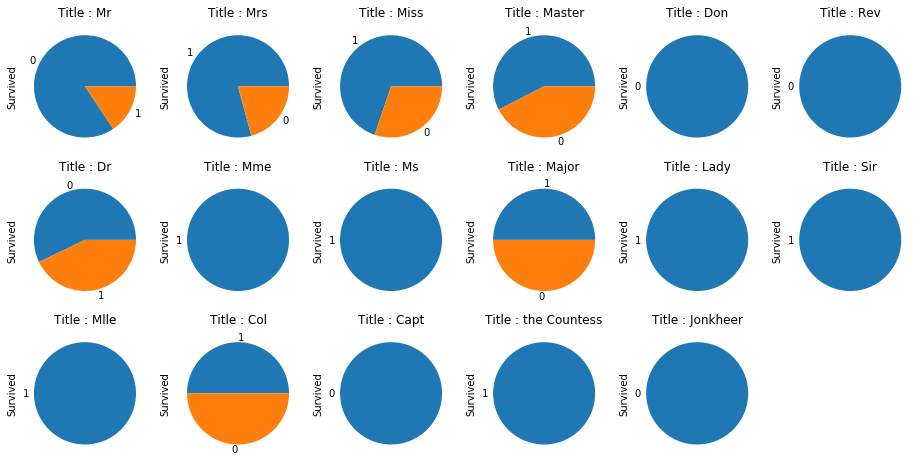

In [6]:
fig = plt.figure(figsize=(16,8))
i = 1
for title in titles:
    fig.add_subplot(3,6,i) 
    i += 1
    plt.title('Title : {}'.format(title))
    data.Survived[data['Name'] == title].value_counts().plot(kind='pie')
    

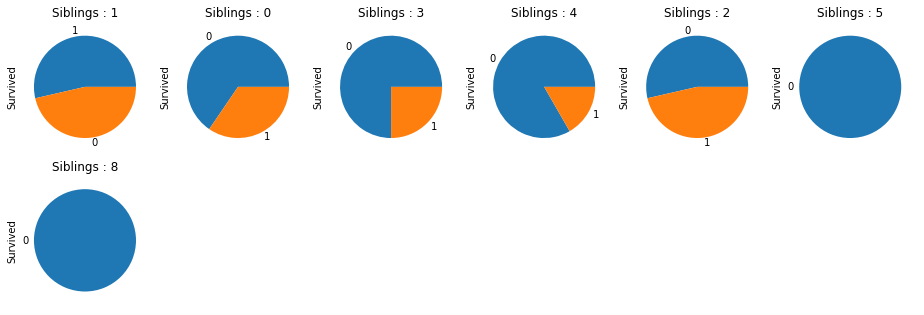

In [7]:
i = 1
fig = plt.figure(figsize=(16,8))
for sibling in data['SibSp'].unique():
    fig.add_subplot(3,6,i)
    plt.title('Siblings : {}'.format(sibling))
    data.Survived[data['SibSp'] == sibling].value_counts().plot(kind='pie')
    i += 1

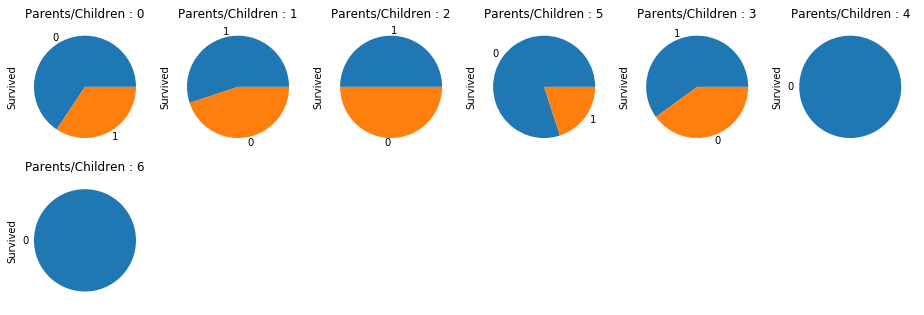

In [8]:
i = 1
fig = plt.figure(figsize=(16,8))
for parch in data['Parch'].unique():
    fig.add_subplot(3,6,i)
    plt.title('Parents/Children : {}'.format(parch))
    data.Survived[data['Parch'] == parch].value_counts().plot(kind='pie')
    i += 1

In [11]:
from sklearn.preprocessing import StandardScaler

data['Fare'].fillna(-1, inplace=True)
medians = dict()
for pclass in data['Pclass'].unique():
    median = data.Fare[(data["Fare"] != -1) & (data['Pclass'] == pclass)].median()
    medians[pclass] = median
for index, row in data.iterrows():
    if row['Fare'] == -1:
        data.loc[index, 'Fare'] = medians[row['Pclass']]
data['Fare'] = StandardScaler().fit_transform(data['Fare'].values.reshape(-1, 1))

test['Fare'].fillna(-1, inplace=True)
medians = dict()
for pclass in test['Pclass'].unique():
    median = test.Fare[(test["Fare"] != -1) & (test['Pclass'] == pclass)].median()
    medians[pclass] = median
for index, row in test.iterrows():
    if row['Fare'] == -1:
        test.loc[index, 'Fare'] = medians[row['Pclass']]
test['Fare'] = StandardScaler().fit_transform(test['Fare'].values.reshape(-1, 1))

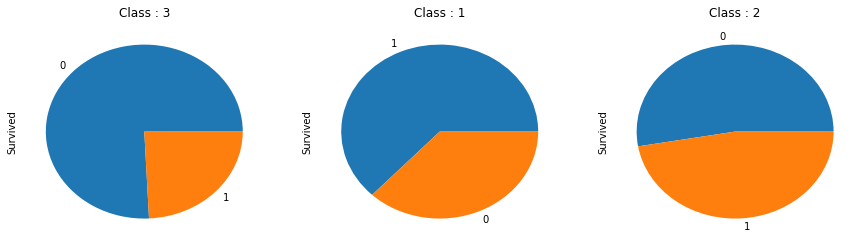

In [12]:
fig = plt.figure(figsize=(15,4))

i=1
for pclass in data['Pclass'].unique():
    fig.add_subplot(1, 3, i)
    plt.title('Class : {}'.format(pclass))
    data.Survived[data['Pclass'] == pclass].value_counts().plot(kind='pie')
    i += 1

In [13]:
data['Cabin'].fillna('U',inplace=True)
data['Cabin'] = data['Cabin'].map(lambda x: x[0])
test['Cabin'].fillna('U',inplace=True)
test['Cabin'] = test['Cabin'].map(lambda x: x[0])

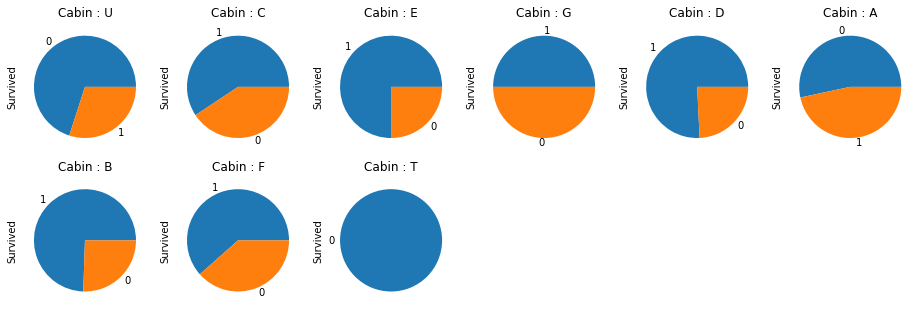

In [14]:
i = 1
fig = plt.figure(figsize=(16,8))
for cabin in data['Cabin'].unique():
    fig.add_subplot(3,6,i)
    plt.title('Cabin : {}'.format(cabin))
    data.Survived[data['Cabin'] == cabin].value_counts().plot(kind='pie')
    i += 1

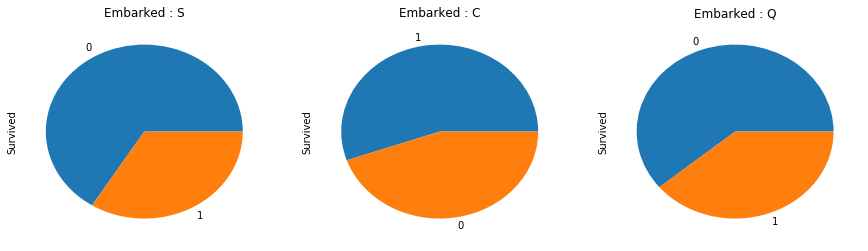

In [15]:
data['Embarked'].fillna('S', inplace=True)
test['Embarked'].fillna('S', inplace=True)
fig = plt.figure(figsize=(15,4))
i = 1
for embarked in data['Embarked'].unique():
    fig.add_subplot(1, 3, i)
    plt.title('Embarked : {}'.format(embarked))
    data.Survived[data['Embarked'] == embarked].value_counts().plot(kind='pie')
    i += 1

In [16]:
#Scaling everything according to respective graphs
replacement_titles = {
    'Rev':0,
    'Don':0,
    'Capt':0,
    'Jonkheer':0,
    'Mr':1,
    'Dr':2,
    'Col':3,
    'Major':3,
    'Master':4,
    'Miss':5,
    'Mrs':6,
    'Mme':7,
    'Ms':7,
    'Lady':7,
    'Sir':7,
    'the Countess':7,
    'Mlle':7,
    'Dona':7
}

data['Name'] = data['Name'].apply(lambda x : replacement_titles.get(x))
test['Name'] = test['Name'].apply(lambda x : replacement_titles.get(x))

In [17]:
replacement_siblings = {
    1:5,
    2:4,
    3:2,
    4:1,
    5:0,
    0:3,
    8:0
}

data['SibSp'] = data['SibSp'].apply(lambda x : replacement_siblings.get(x))
test['SibSp'] = test['SibSp'].apply(lambda x : replacement_siblings.get(x))

In [18]:
replacement_parch = {
    6: 0,
    4: 0,
    5: 1,
    0: 2,
    2: 3,
    1: 4,
    3: 5,
    9: 0
} 
data['Parch'] = data['Parch'].apply(lambda x : replacement_parch.get(x))
test['Parch'] = test['Parch'].apply(lambda x : replacement_parch.get(x))

In [19]:
replacement = {
    'T': 0,
    'U': 1,
    'A': 2,
    'G': 3,
    'C': 4,
    'F': 5,
    'B': 6,
    'E': 7,
    'D': 8
}

data['Cabin'] = data['Cabin'].apply(lambda x: replacement.get(x))
test['Cabin'] = test['Cabin'].apply(lambda x: replacement.get(x))

In [20]:
replacement = {
    'S': 0,
    'Q': 1,
    'C': 2
}

data['Embarked'] = data['Embarked'].apply(lambda x: replacement.get(x))
test['Embarked'] = test['Embarked'].apply(lambda x: replacement.get(x))

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Sex'] = encoder.fit_transform(data['Sex'])
test['Sex'] = encoder.fit_transform(test['Sex'])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['Name'] = scaler.fit_transform(data['Name'].values.reshape(-1, 1))
data['Sex'] = scaler.fit_transform(data['Sex'].values.reshape(-1, 1))
data['Age'] = scaler.fit_transform(data['Age'].values.reshape(-1, 1))
data['Pclass'] = scaler.fit_transform(data['Pclass'].values.reshape(-1, 1))
data['SibSp'] = scaler.fit_transform(data['SibSp'].values.reshape(-1, 1))
data['Parch'] = scaler.fit_transform(data['Parch'].values.reshape(-1, 1))
data['Fare'] = scaler.fit_transform(data['Fare'].values.reshape(-1, 1))
data['Cabin'] = scaler.fit_transform(data['Cabin'].values.reshape(-1, 1))
data['Embarked'] = scaler.fit_transform(data['Embarked'].values.reshape(-1, 1))

test['Name'] = scaler.fit_transform(test['Name'].values.reshape(-1, 1))
test['Sex'] = scaler.fit_transform(test['Sex'].values.reshape(-1, 1))
test['Age'] = scaler.fit_transform(test['Age'].values.reshape(-1, 1))
test['Pclass'] = scaler.fit_transform(test['Pclass'].values.reshape(-1, 1))
test['SibSp'] = scaler.fit_transform(test['SibSp'].values.reshape(-1, 1))
test['Parch'] = scaler.fit_transform(test['Parch'].values.reshape(-1, 1))
test['Fare'] = scaler.fit_transform(test['Fare'].values.reshape(-1, 1))
test['Cabin'] = scaler.fit_transform(test['Cabin'].values.reshape(-1, 1))
test['Embarked'] = scaler.fit_transform(test['Embarked'].values.reshape(-1, 1))


/home/akshaydv/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/akshaydv/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [22]:
survived = data.Survived
data.drop('Survived',axis=1,inplace=True)

In [23]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.827377,-0.797294,0.737695,-0.089634,1.576109,-0.468807,-0.502445,-0.494813,-0.585954
1,-1.566107,1.537975,-1.355574,0.806350,1.576109,-0.468807,0.786845,0.960231,1.942303
2,0.827377,1.070922,-1.355574,0.134362,-0.396241,-0.468807,-0.488854,-0.494813,-0.585954
3,-1.566107,1.537975,-1.355574,0.638353,1.576109,-0.468807,0.420730,0.960231,-0.585954
4,0.827377,-0.797294,0.737695,0.638353,-0.396241,-0.468807,-0.486337,-0.494813,-0.585954


In [24]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.873482,-0.825593,0.755929,0.596870,-0.525887,-0.421511,-0.497071,-0.478344,0.470915
1,0.873482,1.475059,-1.322876,1.296667,1.538159,-0.421511,-0.511934,-0.478344,-0.700767
2,-0.315819,-0.825593,0.755929,2.136424,-0.525887,-0.421511,-0.463762,-0.478344,0.470915
3,0.873482,-0.825593,0.755929,0.176992,-0.525887,-0.421511,-0.482135,-0.478344,-0.700767
4,0.873482,1.475059,-1.322876,-0.102927,1.538159,2.188734,-0.417159,-0.478344,-0.700767


In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 9))
classifier.add(Dropout(rate = 0.4)) 
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.2))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.1))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=15, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
tb = TensorBoard('logs')
# Fitting the ANN to the Training set
classifier.fit(data, survived, batch_size =32, epochs = 100,callbacks=[es, rlr,mcp, tb], validation_split=0.2, verbose=1) 

/home/akshaydv/anaconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 0s 270us/step - loss: 0.6922 - acc: 0.5969 - val_loss: 0.6907 - val_acc: 0.6425

Epoch 00001: val_loss improved from inf to 0.69066, saving model to weights.h5
Epoch 2/100
712/712 [==============================] - 0s 33us/step - loss: 0.6902 - acc: 0.6096 - val_loss: 0.6876 - val_acc: 0.6425

Epoch 00002: val_loss improved from 0.69066 to 0.68764, saving model to weights.h5
Epoch 3/100
712/712 [==============================] - 0s 29us/step - loss: 0.6873 - acc: 0.6096 - val_loss: 0.6824 - val_acc: 0.6425

Epoch 00003: val_loss improved from 0.68764 to 0.68241, saving model to weights.h5
Epoch 4/100
712/712 [==============================] - 0s 38us/step - loss: 0.6810 - acc: 0.6096 - val_loss: 0.6686 - val_acc: 0.6425

Epoch 00004: val_loss improved from 0.68241 to 0.66861, saving model to weights.h5
Epoch 5/100
712/712 [==============================] - 0s 31us/step - loss: 0.6645 - 

712/712 [==============================] - 0s 29us/step - loss: 0.4752 - acc: 0.8076 - val_loss: 0.3704 - val_acc: 0.8547

Epoch 00040: val_loss did not improve from 0.36893
Epoch 41/100
712/712 [==============================] - 0s 29us/step - loss: 0.4716 - acc: 0.7921 - val_loss: 0.3703 - val_acc: 0.8603

Epoch 00041: val_loss did not improve from 0.36893
Epoch 42/100
712/712 [==============================] - 0s 32us/step - loss: 0.4633 - acc: 0.8104 - val_loss: 0.3720 - val_acc: 0.8603

Epoch 00042: val_loss did not improve from 0.36893
Epoch 43/100
712/712 [==============================] - 0s 30us/step - loss: 0.4704 - acc: 0.7978 - val_loss: 0.3701 - val_acc: 0.8603

Epoch 00043: val_loss did not improve from 0.36893
Epoch 44/100
712/712 [==============================] - 0s 28us/step - loss: 0.4529 - acc: 0.8160 - val_loss: 0.3694 - val_acc: 0.8603

Epoch 00044: val_loss did not improve from 0.36893
Epoch 45/100
712/712 [==============================] - 0s 29us/step - loss: 0

712/712 [==============================] - 0s 32us/step - loss: 0.4638 - acc: 0.8118 - val_loss: 0.3646 - val_acc: 0.8603

Epoch 00081: val_loss did not improve from 0.36316
Epoch 00081: early stopping


In [26]:
y_pred = classifier.predict(test)
y_pred = (y_pred > 0.5)
y_pred = y_pred.astype(int)

In [27]:
gender = pd.read_csv('gender_submission.csv')
y_actual = gender.iloc[:, 0].values

In [248]:
import csv
with open('result3.csv', 'w') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['PassengerId'] + ['Survived'])
    for i in range(len(test)):
        spamwriter.writerow([y_actual[i]] + [y_pred[i,0]])
